In [1]:
from fastai.vision.all import *

# Multilabel classification from scratch

From scratch = without looking at the solution.

In [2]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/storage/data/pascal_2007/valid.json'),Path('/storage/data/pascal_2007/test.csv'),Path('/storage/data/pascal_2007/train.json'),Path('/storage/data/pascal_2007/segmentation'),Path('/storage/data/pascal_2007/test'),Path('/storage/data/pascal_2007/train'),Path('/storage/data/pascal_2007/test.json'),Path('/storage/data/pascal_2007/train.csv')]

In [3]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [40]:
db = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter(),
                   get_x=ColReader(0, pref=path/"train"),
                   get_y=ColReader(1, label_delim=' '),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

dls = db.dataloaders(df)

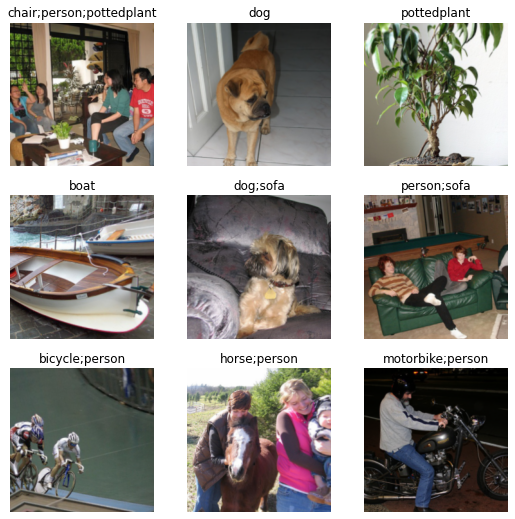

In [42]:
dls.show_batch()

In [45]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=.5))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.914417,0.656787,0.656932,00:51
1,0.783271,0.495710,0.790020,00:51
2,0.570164,0.189518,0.957331,00:51
3,0.328413,0.089549,0.970319,00:51


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.106472,0.086367,0.970697,01:03
1,0.089776,0.080797,0.972889,01:03
2,0.071685,0.074197,0.974562,01:03
